# <ins> Import and load

In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer

from scipy.stats import chi2
from scipy.stats import chi2_contingency

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
test_ID = test.Id
train.drop(["Id"],inplace=True,axis=1)
test.drop(["Id"],inplace=True,axis=1)

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



## <ins> CREATE A MODEL TO PREDICT - LOTFRONTAGE

## Get data

In [658]:
index = train[~train.LotFrontage.isna()].index
index_of_missing = train[train.LotFrontage.isna()].index

In [659]:
train.loc[index].corr()['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64

In [660]:
predictors = ['1stFlrSF','LotArea','GrLivArea','TotalBsmtSF','TotRmsAbvGrd','LotFrontage']
df = train.loc[index,predictors]
df_test = train.loc[index_of_missing,predictors]

### Fix NaN in test for later

In [661]:
test.TotalBsmtSF.fillna(0,inplace=True)

test_indx = test[test.LotFrontage.isna()].index
test_df = test.loc[test_indx,predictors[:-1]]

## Check that they are all normally distributed

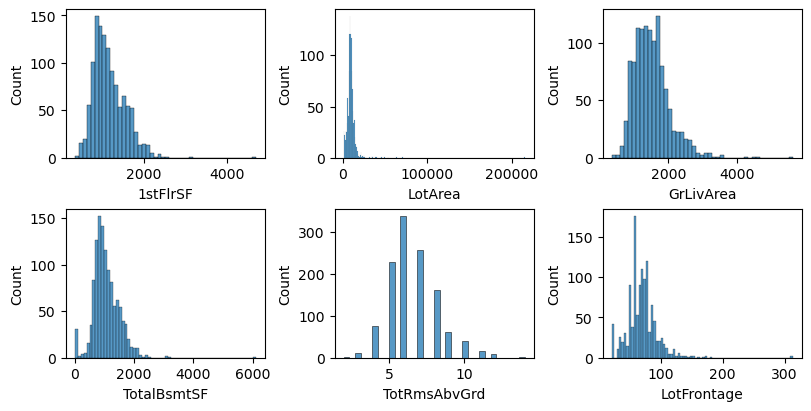

In [662]:
import seaborn as sns
import matplotlib.pyplot as plt

n_cols = len(df.columns)
n_rows = (n_cols // 3) + (n_cols % 3 > 0)

fig, axs = plt.subplots(nrows=n_rows, ncols=3, figsize=(8, 4), 
                        constrained_layout=True)
axs = axs.flatten()

for i, col in enumerate(df.columns):
    ax = axs[i]
    sns.histplot(df[col], ax=ax)


## Split data

In [663]:
target = df.iloc[:,-1]
df = df.iloc[:,:-1]
X_train,X_test,y_train,y_test = train_test_split(df,target,random_state=42)

## Normalize data

In [664]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

## Create models

In [665]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [666]:

# Series to collate mean absolute errors for each algorithm
mae_compare = pd.Series()
mae_compare.index.name = 'Algorithm'

# Linear Regression =================================================
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_val_predictions = linear_model.predict(X_test)
linear_val_mae = mean_absolute_error(scaler.inverse_transform(linear_val_predictions.reshape(-1,1)), y_test)

mae_compare['LinearRegression'] = linear_val_mae
# print("Validation MAE for Linear Regression Model: {:,.0f}".format(linear_val_mae))

# Lasso ==============================================================
lasso_model = Lasso(alpha=0.0005, random_state=5)
lasso_model.fit(X_train, y_train)
lasso_val_predictions = lasso_model.predict(X_test)
lasso_val_mae = mean_absolute_error(scaler.inverse_transform(lasso_val_predictions.reshape(-1,1)), y_test)

mae_compare['Lasso'] = lasso_val_mae
print("Validation MAE for Lasso Model: {:,.0f}".format(lasso_val_mae))

# Ridge ===============================================================
ridge_model = Ridge(alpha=0.002, random_state=5)
ridge_model.fit(X_train, y_train)
ridge_val_predictions = ridge_model.predict(X_test)
ridge_val_mae = mean_absolute_error(scaler.inverse_transform(ridge_val_predictions.reshape(-1,1)), y_test)

mae_compare['Ridge'] = ridge_val_mae
print("Validation MAE for Ridge Regression Model: {:,.0f}".format(ridge_val_mae))


# KNN Regression ========================================================
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_val_predictions = knn_model.predict(X_test)
knn_val_mae = mean_absolute_error(scaler.inverse_transform(knn_val_predictions.reshape(-1,1)), y_test)

mae_compare['KNN'] = knn_val_mae
print("Validation MAE for KNN Model: {:,.0f}".format(knn_val_mae))



# # Support Vector Regression ===========================================
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
svr_val_predictions = svr_model.predict(X_test)
svr_val_mae = mean_absolute_error(scaler.inverse_transform(svr_val_predictions.reshape(-1,1)), y_test)

mae_compare['SVR'] = svr_val_mae
print("Validation MAE for SVR Model: {:,.0f}".format(svr_val_mae))

print('MAE values for different algorithms:')
mae_compare.sort_values(ascending=True).round()

Validation MAE for Lasso Model: 73
Validation MAE for Ridge Regression Model: 73
Validation MAE for KNN Model: 71
Validation MAE for SVR Model: 76
MAE values for different algorithms:


C:\Users\yosefos\AppData\Local\Temp\ipykernel_10496\1557084878.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mae_compare = pd.Series()


Algorithm
KNN                 71.0
Lasso               73.0
Ridge               73.0
LinearRegression    73.0
SVR                 76.0
dtype: float64

### Hypertune KNN using gridsearch

In [667]:


# Define the model
knn_model = KNeighborsRegressor()

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance']}

# Create the grid search object
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train a KNeighborsRegressor with the best parameters
best_knn_model = KNeighborsRegressor(**best_params)
best_knn_model.fit(X_train, y_train)

# Make predictions on the validation data
knn_val_predictions = best_knn_model.predict(X_test)

# Calculate the mean absolute error on the validation data
knn_val_mae = mean_absolute_error(scaler.inverse_transform(knn_val_predictions.reshape(-1,1)), y_test)


## <ins> Predictting LotFrontage using KNNRegressor

#### Scale data

In [668]:
df = train.loc[index,predictors[:-1]]
df_test = train.loc[index_of_missing,predictors[:-1]]
target = train.loc[index,predictors[-1]]
df = scaler.fit_transform(df)
df_test = scaler.transform(df_test)
test_df = scaler.transform(test_df)
target = scaler.fit_transform(target.values.reshape(-1,1))

#### Predict and insert values

In [669]:
knn_model = KNeighborsRegressor(**best_params)
knn_model.fit(df,target)
y_pred = knn_model.predict(df_test)
y_pred = np.int64(scaler.inverse_transform(y_pred.reshape(-1,1)))
# y_pred = pd.Series(y_pred)
train.loc[index_of_missing,'LotFrontage'] = y_pred

y_pred = knn_model.predict(test_df)
y_pred = np.int64(scaler.inverse_transform(y_pred.reshape(-1,1)))
test.loc[test_indx,'LotFrontage'] = y_pred



# <ins> Handling missing values in train -

In [670]:
cat_columns = train.select_dtypes(include='object').columns
train.MasVnrArea = train.MasVnrArea.fillna(0)
test.MasVnrArea = test.MasVnrArea.fillna(0)

# Categorical columns:
cat_cols_fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                     'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
                     'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'BsmtCond',
                     'MasVnrType']
for cat in cat_cols_fill_none:
    train[cat] = train[cat].fillna("None")
    test[cat] = test[cat].fillna("None")

# <ins> Are train and test similar in LotArea?
Seems not at all, train has some huge houses compared to test.
1. Are theses houses all in the same neighborhood? No.
2. How many houses in train are above 50k LotArea ( max of test)? 6.

In [671]:
train.describe().iloc[:,2:3]

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


In [672]:
test.describe().iloc[:,2:3]

,LotArea
count,1459.000000
mean,9819.161069
std,4955.517327
min,1470.000000
25%,7391.000000
50%,9399.000000
75%,11517.500000
max,56600.000000


In [673]:
train.drop(train[train.LotArea > 56600].index,inplace=True)

# <ins> Which features are very different indistribution between test and train?
LowQualFinSF? 

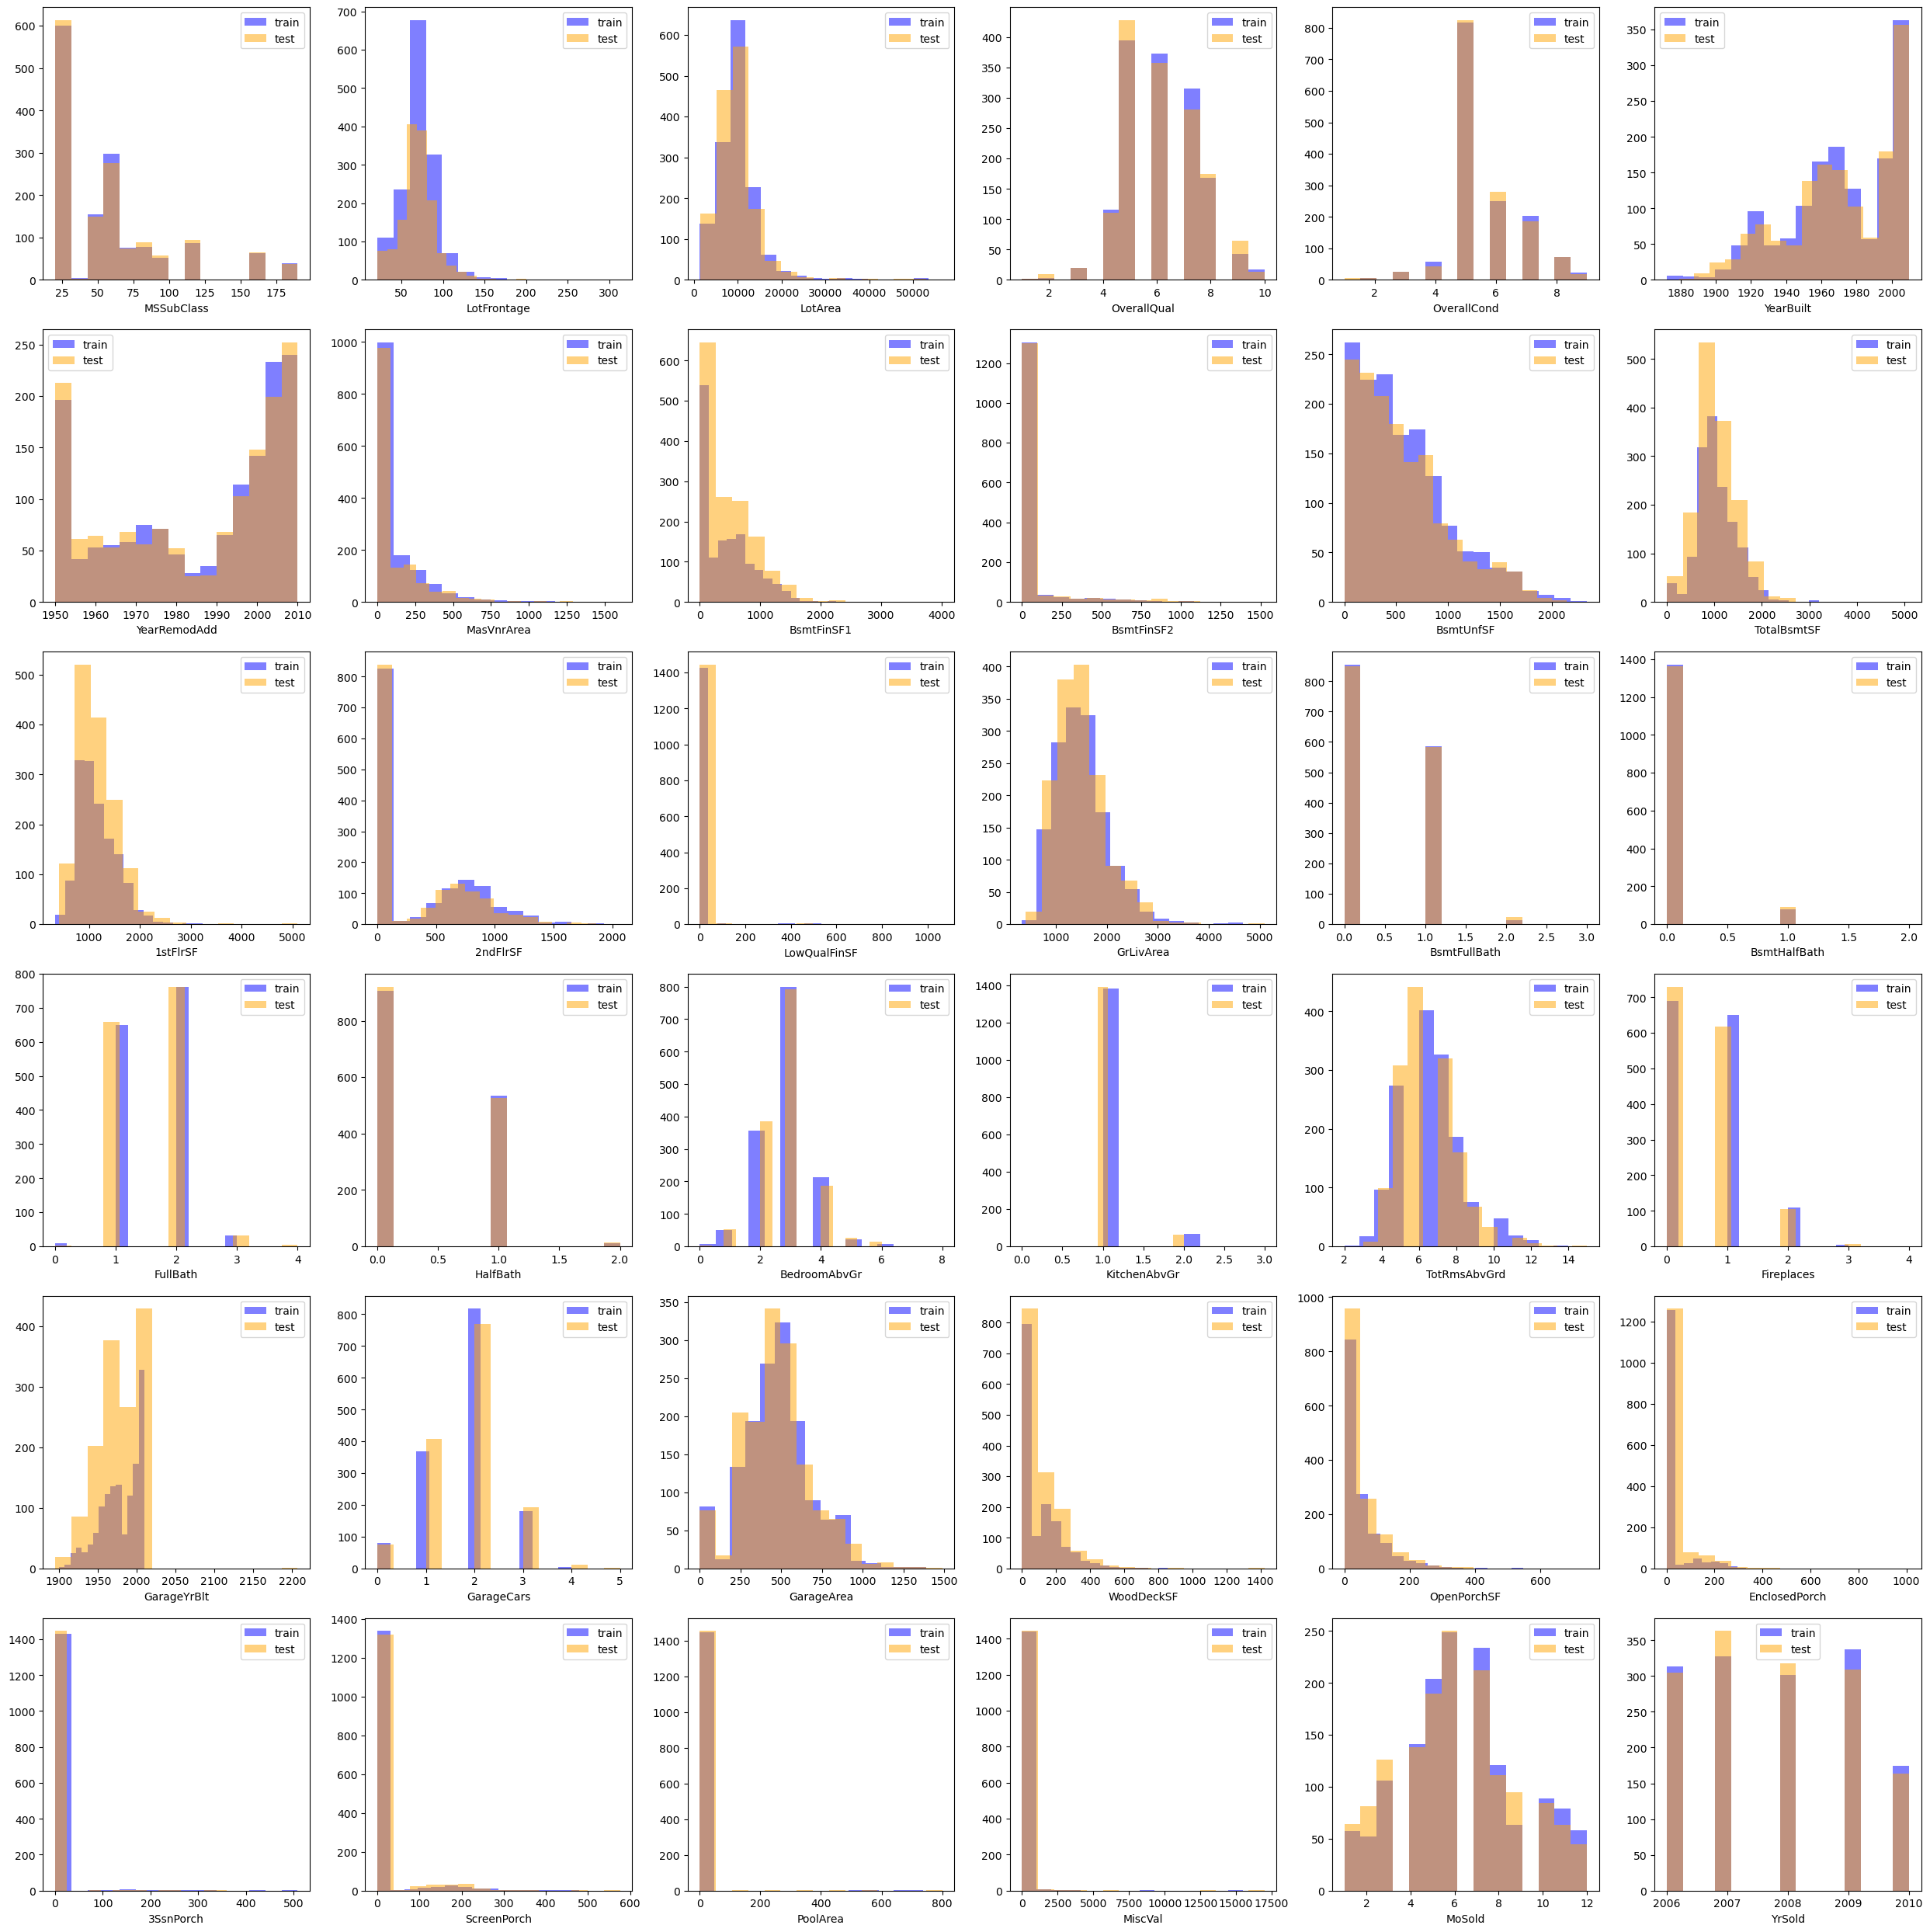

In [674]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
for i, col in enumerate(train.select_dtypes(exclude="object").columns[:-1]):
    plt.subplot(6, 6, i+1)
    plt.hist(train[col],bins=15, alpha=0.5, label='train', color='blue',density=False)
    plt.hist(test[col], bins=15,alpha=0.5, label='test', color='orange',density=False)
    plt.xlabel(col)
    plt.legend()
plt.tight_layout()
plt.show()


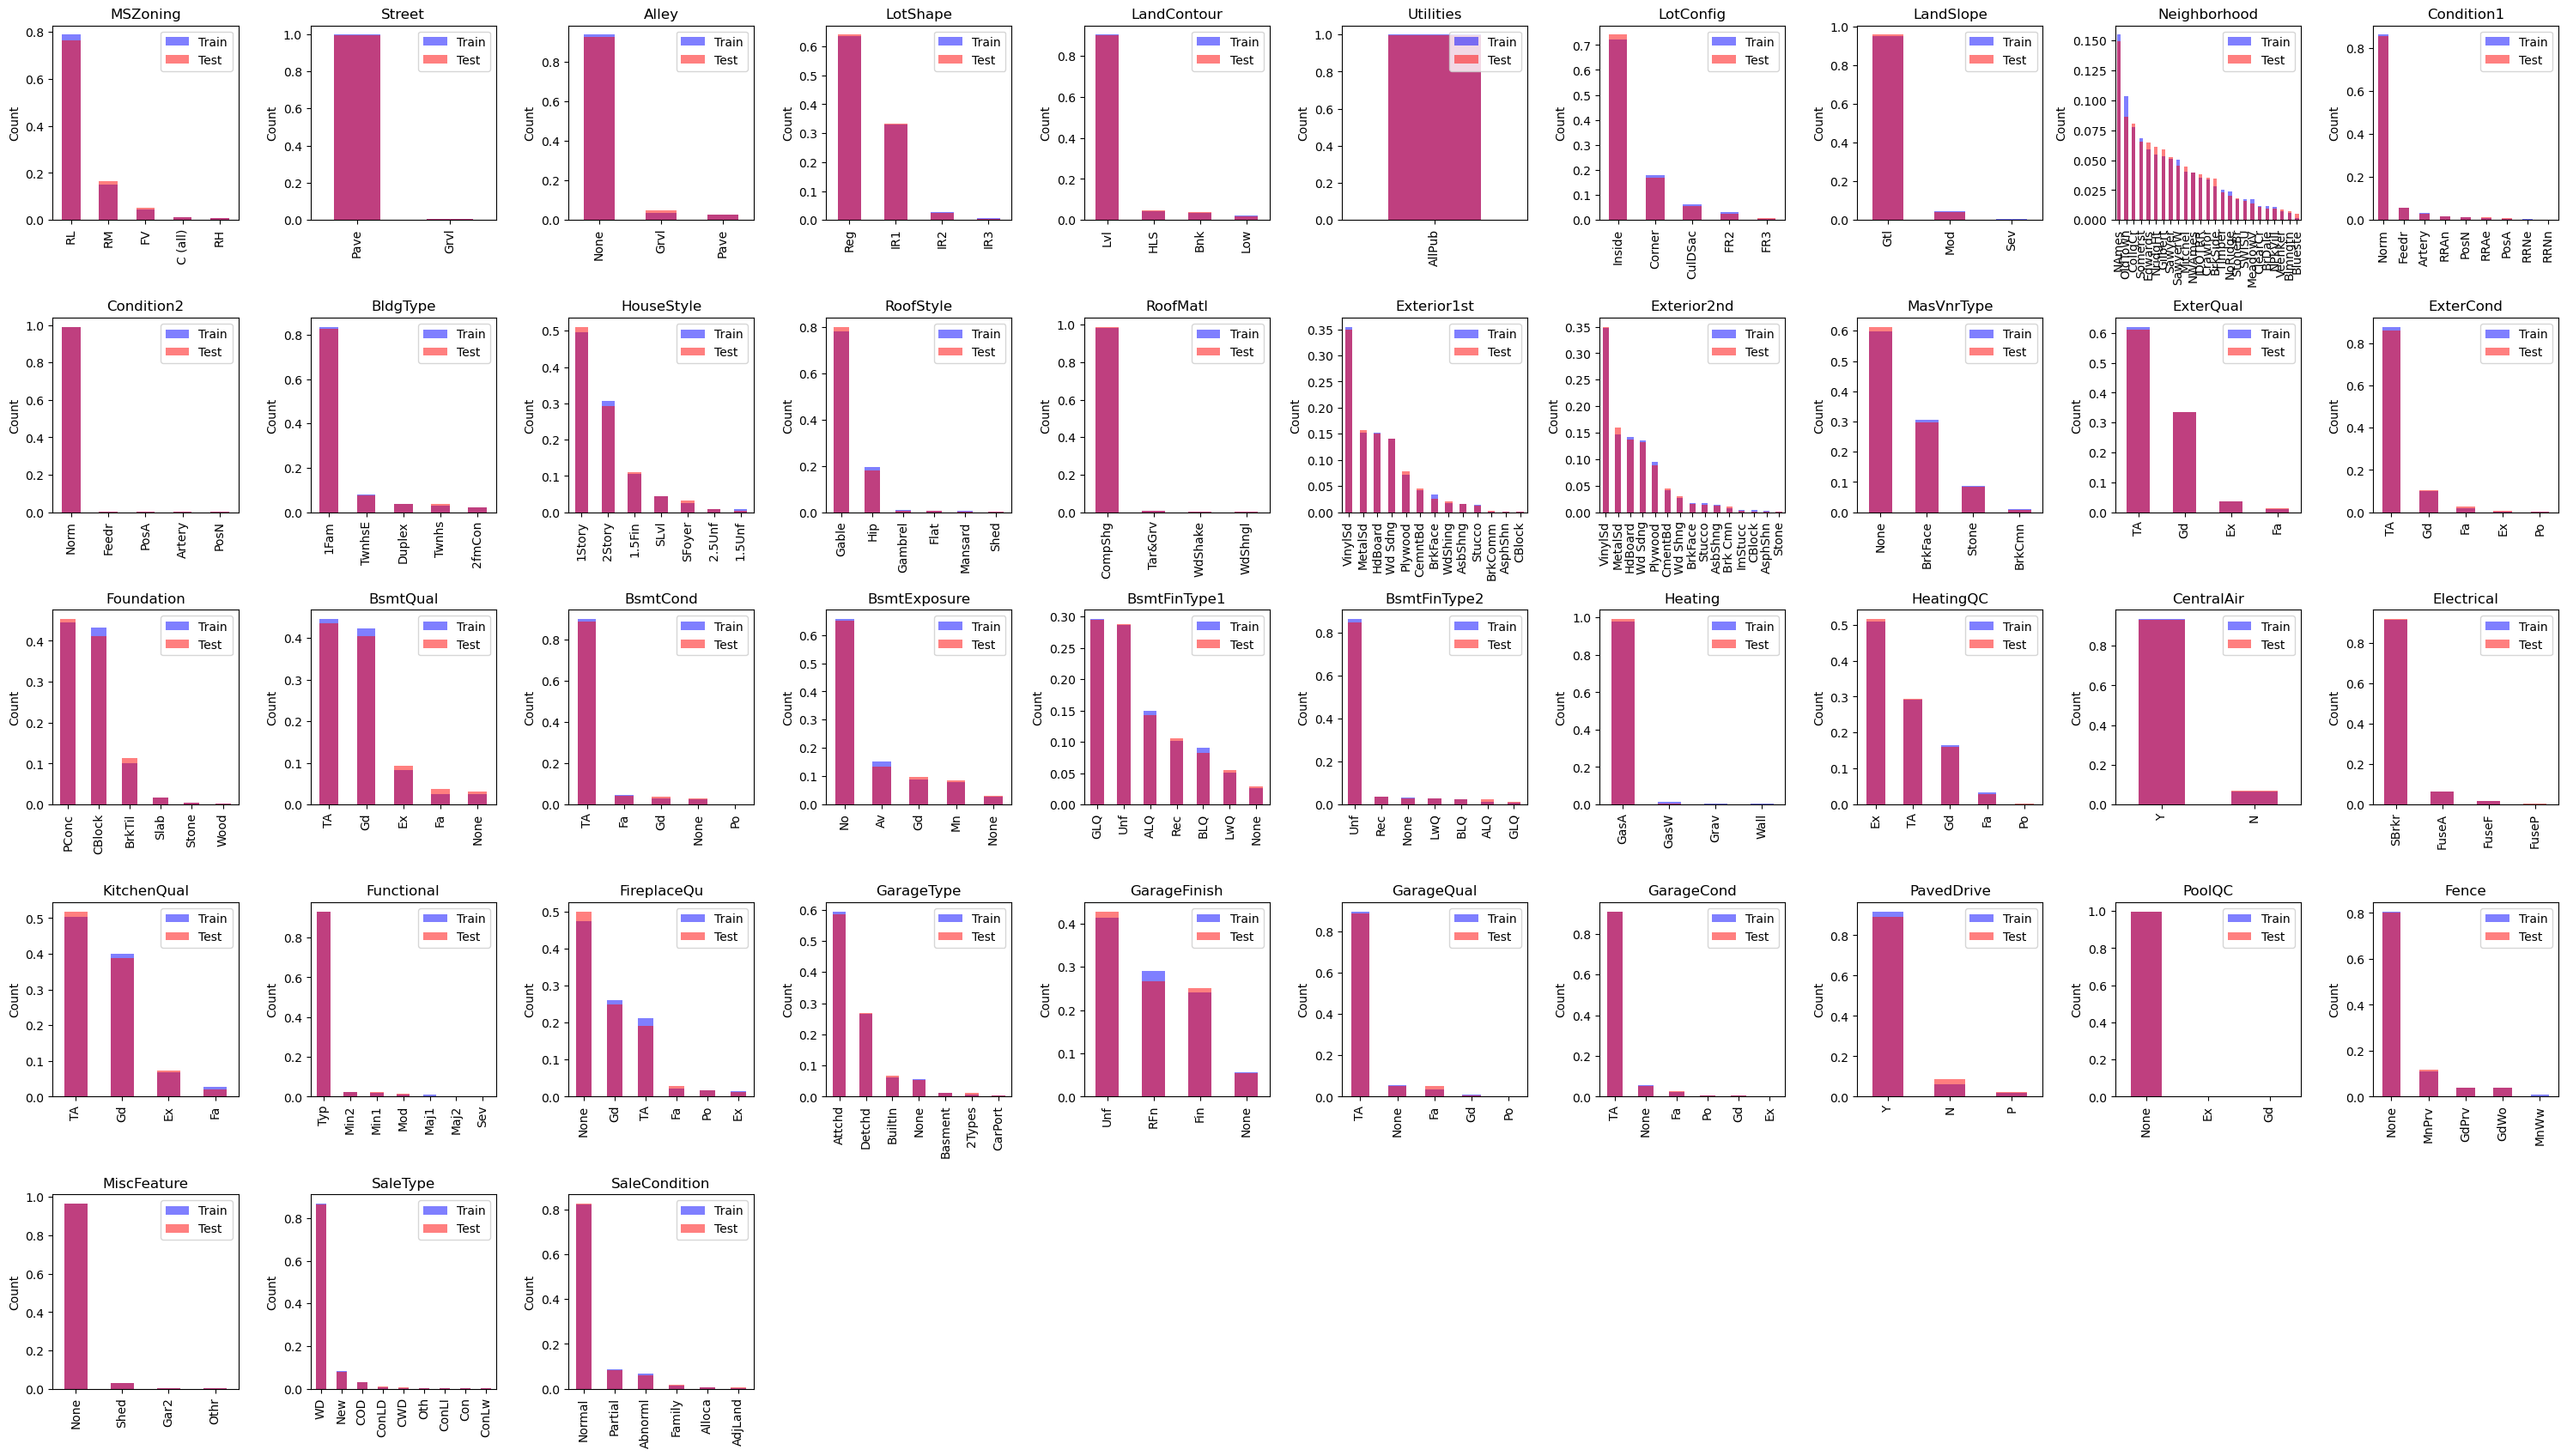

In [675]:
plt.figure(figsize=(30,30))
for i,col in enumerate (train.select_dtypes(include='object').columns):
# Count the number of occurrences of each neighborhood in both dataframes
    plt.subplot(9,10,i+1)
    train_counts = train[col].value_counts()
    test_counts = test[col].value_counts()
    train_density = train[col].value_counts() / train.shape[0]
    test_density = test[col].value_counts() / test.shape[0]

    # Plot the counts of neighborhoods on the same plot
    train_density.plot(kind='bar', color='blue', alpha=0.5, label='Train')
    test_density.plot(kind='bar', color='red', alpha=0.5, label='Test')


    # Add a title and labels to the x and y axes
    plt.title(col)
    plt.ylabel("Count")

    # Add a legend to the plot
    plt.legend()
plt.tight_layout()
# Show the plot



# <ins> Handling Outliers

In [676]:
# Remove outliers based on observations on scatter plots against SalePrice:
train = train.drop(train['LotFrontage']
                                     [train['LotFrontage']>200].index)
train = train.drop(train['LotArea']
                                     [train['LotArea']>100000].index)
train = train.drop(train['BsmtFinSF1']
                                     [train['BsmtFinSF1']>4000].index)
train = train.drop(train['TotalBsmtSF']
                                     [train['TotalBsmtSF']>6000].index)
train = train.drop(train['1stFlrSF']
                                     [train['1stFlrSF']>4000].index)
train = train.drop(train.GrLivArea
                                     [(train['GrLivArea']>4000) & 
                                      (train.SalePrice <300000)].index)
train = train.drop(train.LowQualFinSF
                                     [train['LowQualFinSF']>550].index)


# <ins> Changing SalePrice to log for regression to reduce skew 
Skew is probalematic for regression models.

In [677]:
train['SalePrice'] = np.log(train['SalePrice'])
train = train.rename(columns={'SalePrice': 'SalePrice_log'})

In [678]:
Area = ['GarageArea','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GrLivArea','LowQualFinSF','2ndFlrSF','1stFlrSF','WoodDeckSF','OpenPorchSF','PoolArea']




# <ins> Dropping shitty features

In [679]:
attributes_drop = ['SalePrice_log', 'MiscVal', 'MSSubClass', 'MoSold', 'YrSold', 
                   'GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd'] # high corr with other attributes
X = train.drop(attributes_drop , axis=1)
X['TotArea'] = train[Area].sum(axis=1)
X.drop(Area[1:],axis=1,inplace=True)
X = pd.get_dummies(X)

# <ins> Scaling features and splitting to test train

In [680]:
X_train,X_test,y_train,y_test = train_test_split(X, train.SalePrice_log, random_state=0,train_size=0.2)

# Normalisation - to be added later
normaliser = StandardScaler()
X_train = normaliser.fit_transform(X_train)
X_test = normaliser.transform(X_test)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

# <ins> Testing lasso - Score on submission: 0.13623

In [681]:
lasso_model = Lasso(alpha=0.005, random_state=5)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
lasso_test_rmse = mean_absolute_percentage_error(np.exp(y_pred), np.exp(y_test))
print(lasso_test_rmse)

0.10045753180029356


In [682]:
X.columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=281)

# <ins> Testing XGboost

In [683]:

# # Define the parameter grid to search
# param_grid = {'n_estimators': [100, 500, 1000],
#               'max_depth': [3, 5, 7, 12,20,30,40]}

# # Initialize the XGBoost regressor
# model = xgb.XGBRegressor()

# # Perform grid search
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Make predictions on the test data using the best estimator
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Calculate the mean squared error of the predictions
# mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))


# <ins> Improving features
1. Replace categorical features that are ordinal by nature to numbers? Change MSSubClass to string?
2. Should some features be dropped? How would you choose features?
2. What features can be engineered?
3. What model is best for testing features importance?

### <ins> Option #1:

Should i remove Fence ranking? Try with and without and check results: WORSE

In [684]:
# mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0,
#             'Av': 3, 'Mn': 2, 'No': 1,
#            'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,
#            'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0,
#            'Fin': 3, 'RFn': 2, 'Unf': 1, 'Very Excellent':10, 'Excellent': 9, 'Very Good': 8, 'Good': 7, 'Above Average': 6, 'Average': 5, 'Below Average': 4
#           ,'Fair': 3, 'Poor': 2, 'Very Poor': 1
#           ,'GdPrv': 4,'MnPrv': 3,'GDWo': 2,'MnWw': 1}



# columns = ['Fence','PoolQC','GarageCond','GarageQual','GarageFinish','FireplaceQu','KitchenQual','HeatingQC','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','ExterCond','ExterQual']

# for col in columns:
#     train[col] = train[col].map(mapping)
#     test[col] = test[col].map(mapping)

# test['MSSubClass'] = test['MSSubClass'].astype(str)
# train['MSSubClass'] = train['MSSubClass'].astype(str)

#### What did it do to RMSE? 
worse than before

In [685]:
X = train.drop(attributes_drop, axis=1)
X = pd.get_dummies(X)
X_train,X_test,y_train,y_test = train_test_split(X, train.SalePrice_log, random_state=0,train_size=0.2)

# Normalisation - to be added later
normaliser = StandardScaler()
X_train = normaliser.fit_transform(X_train)
X_test = normaliser.transform(X_test)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)
lasso_model = Lasso(alpha=0.005, random_state=5)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
lasso_test_rmse = mean_absolute_percentage_error(np.exp(y_pred), np.exp(y_test))
print(lasso_test_rmse)

0.081346574629316


In [686]:
from sklearn.ensemble import BaggingRegressor
X = train.drop(attributes_drop, axis=1)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, train.SalePrice_log, random_state=0, train_size=0.2)

# Normalization
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

# Final imputation of missing data
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)
for n in [3,5,10,20]:
    for a in [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]:
        lasso = Lasso(alpha=a, random_state=5)
        bagging_lasso = BaggingRegressor(base_estimator=lasso, n_estimators=n, random_state=5)
        bagging_lasso.fit(X_train, y_train)
        y_pred = bagging_lasso.predict(X_test)
        bagging_lasso_test_rmse = mean_absolute_percentage_error(np.exp(y_pred), np.exp(y_test))
        print(bagging_lasso_test_rmse)


0.125761098596494
0.10004048031928449
0.09114757140995482
0.08288034864737437
0.0855376410504488
0.11874696761206123
0.15893264426348105
0.11368688102014513
0.09587079017037929
0.08881664342244841
0.08179381783083294
0.08394011412051615
0.11744293827785554
0.16090888047430907
0.11151210300271448
0.09454962903416991
0.08852440323352664
0.08205115506741047
0.08428425008596338
0.11932157534992127
0.16296752322162567
0.10733487774969891
0.09319003389997857
0.08828924300797437
0.08187107631033448
0.08453739199983004
0.11902352686085317
0.1629500490265948


In [687]:



# X = train.drop(attributes_drop, axis=1)
# X = pd.get_dummies(X)
# X_train, X_test, y_train, y_test = train_test_split(X, train.SalePrice_log, random_state=0, train_size=0.2)

# # Normalization
# normalizer = StandardScaler()
# X_train = normalizer.fit_transform(X_train)
# X_test = normalizer.transform(X_test)

# # Final imputation of missing data
# my_imputer = SimpleImputer()
# X_train = my_imputer.fit_transform(X_train)
# X_test = my_imputer.transform(X_test)

# lasso = Lasso(random_state=5)
# bagging_lasso = BaggingRegressor(base_estimator=lasso, n_estimators=10, random_state=5)

# # Grid search parameters
# param_grid = {'base_estimator__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
#               'n_estimators': [10, 20, 30, 40, 50]}

# grid_search = GridSearchCV(bagging_lasso, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Best parameters
# print(grid_search.best_params_)

# # Predict using the best parameters
# y_pred = grid_search.predict(X_test)
# grid_search_test_rmse = mean_absolute_percentage_error(np.exp(y_pred), np.exp(y_test))
# print(grid_search_test_rmse)


In [688]:

X = train.drop(attributes_drop, axis=1)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, train.SalePrice_log, random_state=0, train_size=0.2)

# Normalization
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

# Final imputation of missing data
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)

lasso = Lasso(random_state=5,alpha=0.005)
bagging_lasso = BaggingRegressor(base_estimator=lasso, n_estimators=40, random_state=5)
bagging_lasso.fit(X_train,y_train)
y_pred = np.exp(bagging_lasso.predict(X_test))
print(mean_absolute_percentage_error(y_pred,np.exp(y_test)))




0.08155164438307369


### <ins> Option #2: Iterating over features and checking RMSE
None drops %

In [689]:
X = train.drop(attributes_drop, axis=1)
remaining_columns = X.columns
features_consider_dropping = []
for col in remaining_columns:
    X_dropped = X.drop([col],axis=1)
    X_dropped = pd.get_dummies(X_dropped)
    X_train,X_test,y_train,y_test = train_test_split(X_dropped, train.SalePrice_log, random_state=0,train_size=0.2)

    # Normalisation - to be added later
    normaliser = StandardScaler()
    X_train = normaliser.fit_transform(X_train)
    X_test = normaliser.transform(X_test)

    # Final imputation of missing data - to address those outstanding after previous section
    my_imputer = SimpleImputer()
    X_train = my_imputer.fit_transform(X_train)
    X_test = my_imputer.transform(X_test)
    lasso_model = Lasso(alpha=0.0005, random_state=5)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    rmse_of_drop = mean_absolute_percentage_error(np.exp(y_pred), np.exp(y_test))
    lower_than_before = rmse_of_drop < lasso_test_rmse
    
    
    if lower_than_before:
        features_consider_dropping.append(col)
        print((rmse_of_drop),col)

Create list of all possible feature combinations

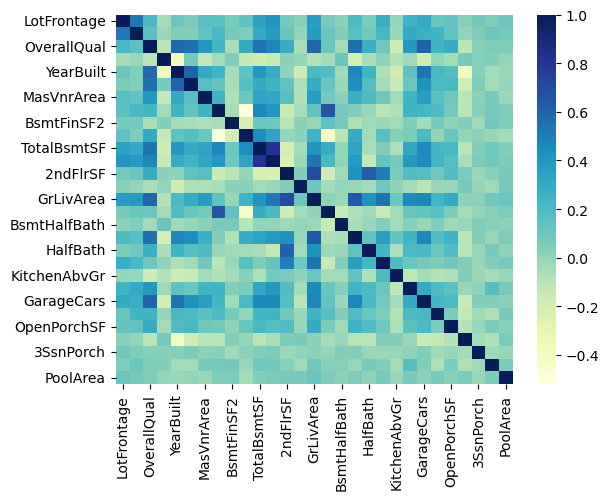

In [690]:

# Compute the correlation matrix
corr_matrix = np.round(train.drop(attributes_drop, axis=1).corr(),2)
corr_matrix
# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False, cmap="YlGnBu")
plt.show()

#### <ins> Using Cramer V statistic to calculate correlation between the categorical features
These are the most correlation:
1. MSZoning  Neighborhood     0.640262
2. BsmtCond  BsmtFinType1     0.506967
3. BsmtCond  BsmtFinType2     0.494442
4. Neighborhood     ExterQual     0.490052

Neighborhood appears in many of the top correlations, which makes since, and therefor we will keep it.

What happens to RMSE whe i drop the features Neighborhood is correlated with?

In [691]:
# def cramers_v(confusion_matrix):
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# def categorical_correlation(df, method='cramer'):
#     result = []
#     columns = df.columns
#     for i in range(len(columns)):
#         for j in range(len(columns)):
#             if i == j:
#                 continue
#             if method == 'chi2':
#                 ct = pd.crosstab(df[columns[i]], df[columns[j]])
#                 result.append([columns[i], columns[j], chi2_contingency(ct)[1]])
#             elif method == 'cramer':
#                 ct = pd.crosstab(df[columns[i]], df[columns[j]])
#                 result.append([columns[i], columns[j], cramers_v(ct.values)])
#     return pd.DataFrame(result, columns=['Feature 1', 'Feature 2', 'Correlation'])

# corr_df = np.round(categorical_correlation(train[categorical_features_to_drop]).sort_values(by='Correlation',ascending=False),10)
# sns.heatmap(corr_df.pivot('Feature 1', 'Feature 2', 'Correlation'), annot=False, cmap='coolwarm')
# plt.show()



Dropping features Neighborhood is correlated with:

Dropping both correlated to neighborhood and unimportant:

### We got to the lowest RMSE so far, lets update the attribute_drop list:

In [692]:
X = train.drop(attributes_drop, axis=1)
X = pd.get_dummies(X)
X_train,X_test,y_train,y_test = train_test_split(X, train.SalePrice_log, random_state=0,train_size=0.2)

# Normalisation - to be added later
normaliser = StandardScaler()
X_train = normaliser.fit_transform(X_train)
X_test = normaliser.transform(X_test)

# Final imputation of missing data - to address those outstanding after previous section
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)
lasso_model = Lasso(alpha=0.005, random_state=5)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
lasso_test_rmse = mean_absolute_percentage_error(np.exp(y_pred), np.exp(y_test))
print((lasso_test_rmse))

0.081346574629316


# <ins> Handling missing values in test - This part should be reviewed/improved
begin by dropping the columns we won't use anyway:

In [693]:
attributes_drop.remove("SalePrice_log")
test.drop(attributes_drop,axis=1,inplace=True)
attributes_drop.append("SalePrice_log")

#### Which features still ahve missing values?

In [694]:

# Get a Boolean DataFrame indicating missing values
missing_values = test.isna().any()

# Get the columns that have missing values

# Get the count of missing values per column
missing_values_count = test.isna().sum()

# Get the columns that have missing values and sort by number of missing values
columns_with_missing_values = missing_values_count[missing_values].sort_values().index.tolist()


for column in columns_with_missing_values:
    count = missing_values_count[column]
    print(f'"{column}" has {count} missing value(s).')

"Exterior1st" has 1 missing value(s).
"Exterior2nd" has 1 missing value(s).
"BsmtFinSF1" has 1 missing value(s).
"BsmtFinSF2" has 1 missing value(s).
"BsmtUnfSF" has 1 missing value(s).
"KitchenQual" has 1 missing value(s).
"GarageCars" has 1 missing value(s).
"SaleType" has 1 missing value(s).
"Utilities" has 2 missing value(s).
"BsmtFullBath" has 2 missing value(s).
"BsmtHalfBath" has 2 missing value(s).
"Functional" has 2 missing value(s).
"MSZoning" has 4 missing value(s).


In [695]:
test.loc[691,'Exterior1st'] = "Other"
test.loc[691,'Exterior2nd'] = "Other"
test.loc[660,'BsmtFinSF1'] = 0
test.loc[660,'BsmtFinSF2'] = 0
test.loc[660,'BsmtHalfBath'] = 0
test.loc[728,'BsmtHalfBath'] = 0
test.loc[660,'BsmtUnfSF'] = 0
test.loc[95,'KitchenQual'] = "None"
test.loc[660,'BsmtFullBath'] = 0
test.loc[728,'BsmtFullBath'] = 0
test.loc[1116,'GarageCars'] = 0

### Functional : Not sure how to handle, this houses seem to be very old and in bad shape, for now give them worst rank

test.loc[756,'Functional'] = 1
test.loc[1013,'Functional'] = 1

### Utilities fill with AllPub since its the only option
test.Utilities.fillna("AllPub",inplace=True)
# Group the data by "Neighborhood" column
grouped = test.groupby("Neighborhood")

test.loc[1029,'SaleType'] = 'Oth'
test.MSZoning.fillna("RL",inplace=True)


In [696]:

# Get a Boolean DataFrame indicating missing values
missing_values = test.isna().any()

# Get the columns that have missing values

# Get the count of missing values per column
missing_values_count = test.isna().sum()

# Get the columns that have missing values and sort by number of missing values
columns_with_missing_values = missing_values_count[missing_values].sort_values().index.tolist()


for column in columns_with_missing_values:
    count = missing_values_count[column]
    print(f'"{column}" has {count} missing value(s).')
    

## Should Utilities/RoofMatl/HouseStyle/Condition2 be dropped?

### Aligning test and train data

In [697]:
test = pd.get_dummies(test)

train_cols = X.columns
test_cols = test.columns
cols_missing_in_test = list(np.setdiff1d(train_cols,test_cols)) 


for col in cols_missing_in_test:
    test[col] = 0
test = test[train_cols]
X, test = X.align(test, join='left', axis=1)


# <ins> Testing prediction on best model so far:

In [698]:
lasso_model = Lasso(alpha=0.005, random_state=5,)
lasso_model.fit(X, train.SalePrice_log)
y_pred = np.exp(lasso_model.predict(test))
output = pd.DataFrame({'Id': test_ID,
                       'SalePrice': y_pred})

output.to_csv('submission_improved.csv', index=False)

## <ins> Finding the combination that lowers RMSE most:
This will likely yield in overfitting, however seeing the combination of features that drops the rmse most might help gain insight to which features should be dropped that will lower test RMSE most

#### Find combinations

#### Iterate through combination

# <ins> Improving Model
1. What other models are suitable?
2. Can Lasso hyper-params be improved?

# <ins> differencein test and train data